In [19]:
from var4d_components import Var4D_Components
from visualize_results import Visualize_Obs, Visualize_Fluxes

### An inversion with all in situ observations and no biases

In [4]:
var4d = Var4D_Components('all_is', verbose=True, store_intermediate=False)
flux_corr_structure = {'temp_corr': 2.0} # 2-month temporal correlation, no horizontal correlation
obs_assim_dict = {'is': True}
var4d.var4d_setup(obs_to_assim=obs_assim_dict, corr_structure=flux_corr_structure, prior_unc_scale=0.25) # prior flux error = 0.25 * abs(prior flux)
var4d.var4d_chain(max_iter=500, optim_method='BFGS')






Converting CT2022 to state vector:   0%|                                                                                                 | 0/24 [00:00<?, ?it/s]




Converting CT2022 to state vector: 100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 143.38it/s]


    Read Jacobian in  11.01s
    Simulated transport in  0.17s
462509 of 1156383 obs will be assimilated
  Created true obs in  11.38s







Converting SiB4 to state vector:   0%|                                                                                                   | 0/24 [00:00<?, ?it/s]




Converting SiB4 to state vector:  21%|██████████████████▉                                                                        | 5/24 [00:00<00:00, 48.62it/s]




Converting SiB4 to state vector:  42%|█████████████████████████████████████▌                                                    | 10/24 [00:00<00:00, 49.22it/s]




Converting SiB4 to state vector:  62%|████████████████████████████████████████████████████████▎                                 | 15/24 [00:00<00:00, 49.05it/s]




Converting SiB4 to state vector: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 48.94it/s]


  Prior fluxes and covariance setup in  0.55s
  Simulated transport in  0.28s
      Simulated transport in  0.26s
    [1] Cost calculated in  0.27s (J = 4.826e+06)
    [1] Gradient calculated in  0.21s (⎸∂J/∂ξ⎹ = 1.018e+06)
      Simulated transport in  0.18s
    [2] Cost calculated in  0.19s (J = 3.918e+06)
    [2] Gradient calculated in  0.19s (⎸∂J/∂ξ⎹ = 8.503e+05)
      Simulated transport in  0.17s
    [3] Cost calculated in  0.19s (J = 2.962e+06)
    [3] Gradient calculated in  0.21s (⎸∂J/∂ξ⎹ = 1.433e+06)
      Simulated transport in  0.18s
    [4] Cost calculated in  0.19s (J = 1.974e+06)
    [4] Gradient calculated in  0.20s (⎸∂J/∂ξ⎹ = 1.318e+06)
      Simulated transport in  0.17s
    [5] Cost calculated in  0.19s (J = 4.462e+06)
    [5] Gradient calculated in  0.19s (⎸∂J/∂ξ⎹ = 1.52e+06)
      Simulated transport in  0.18s
    [6] Cost calculated in  0.19s (J = 1.752e+06)
    [6] Gradient calculated in  0.20s (⎸∂J/∂ξ⎹ = 1.312e+06)
      Simulated transport in  0.18s
    [7] Cos

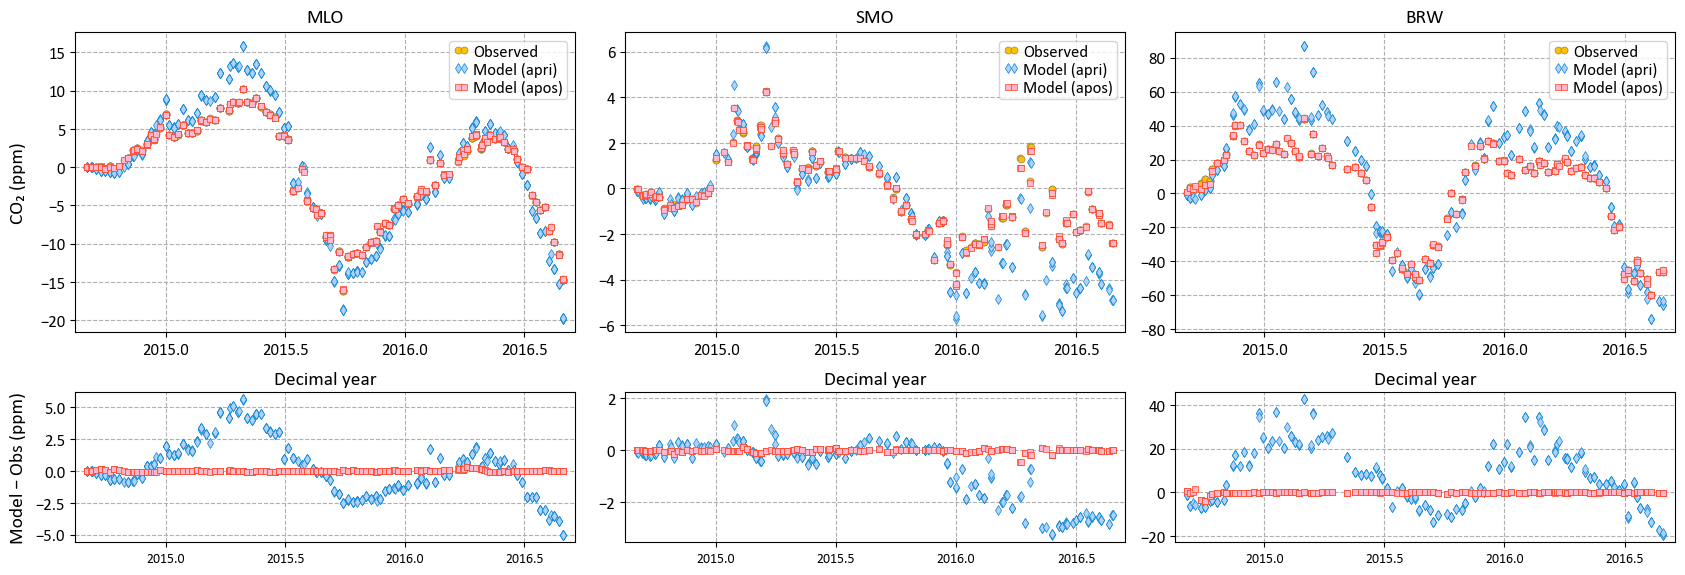

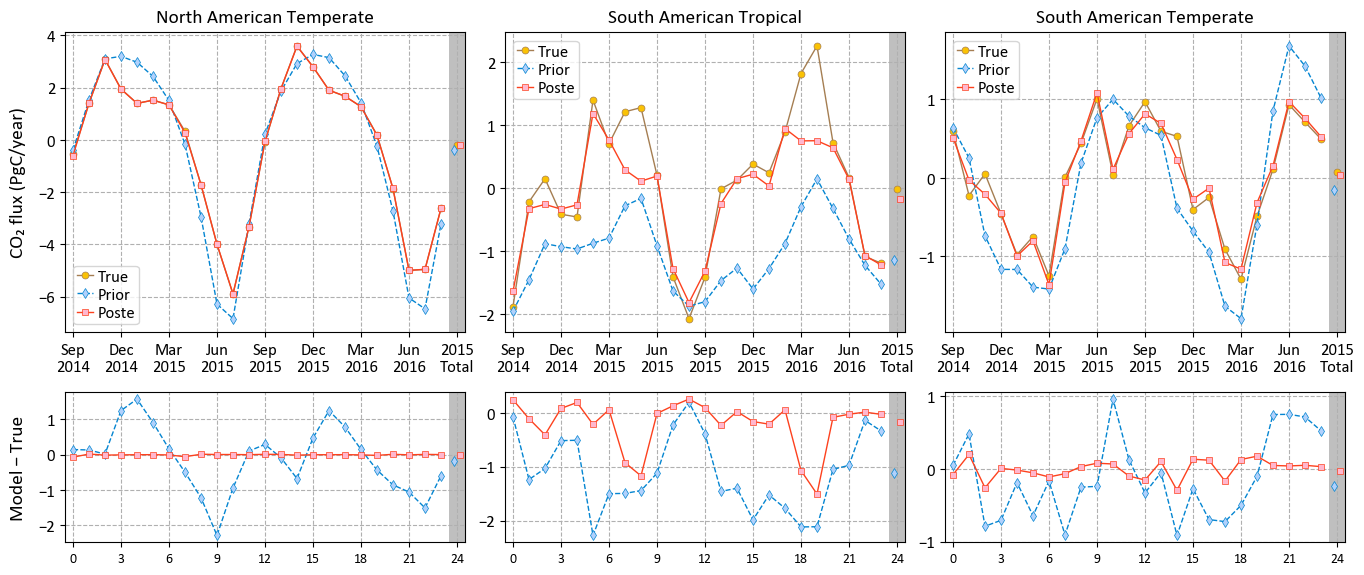

In [21]:
po1 = Visualize_Obs('all_is')
vf1 = Visualize_Fluxes('all_is')
po1.plot_site(['mlo','smo', 'brw'])
vf1.plot_region(['North American Temperate', 'South American Tropical', 'South American Temperate'])

#### Now, do the same inversion but with all in situ obs shifted by a constant number

In [8]:
var4d = Var4D_Components('all_is_const_bias', verbose=True, store_intermediate=False)
flux_corr_structure = {'temp_corr': 2.0} # 2-month temporal correlation, no horizontal correlation
obs_assim_dict = {'is': True}
var4d.var4d_setup(obs_to_assim=obs_assim_dict, corr_structure=flux_corr_structure, prior_unc_scale=0.25) # prior flux error = 0.25 * abs(prior flux)
var4d.add_obs_bias(2.0, platform='is') # add 2 ppm to all obs
var4d.var4d_chain(max_iter=500, optim_method='BFGS')

Converting CT2022 to state vector: 100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 184.88it/s]


    Read Jacobian in  9.80s
    Simulated transport in  0.18s
462509 of 1156383 obs will be assimilated
  Created true obs in  10.14s


Converting SiB4 to state vector: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 49.04it/s]


  Prior fluxes and covariance setup in  0.54s
Added 2.0 ppm bias to 462509 out of 1156383 obs
  Simulated transport in  0.18s
      Simulated transport in  0.18s
    [1] Cost calculated in  0.20s (J = 7.251e+06)
    [1] Gradient calculated in  0.19s (⎸∂J/∂ξ⎹ = 2.456e+06)
      Simulated transport in  0.18s
    [2] Cost calculated in  0.19s (J = 5.558e+06)
    [2] Gradient calculated in  0.19s (⎸∂J/∂ξ⎹ = 1.086e+06)
      Simulated transport in  0.17s
    [3] Cost calculated in  0.18s (J = 2.849e+06)
    [3] Gradient calculated in  0.19s (⎸∂J/∂ξ⎹ = 9.332e+05)
      Simulated transport in  0.17s
    [4] Cost calculated in  0.18s (J = 2.44e+07)
    [4] Gradient calculated in  0.18s (⎸∂J/∂ξ⎹ = 3.874e+06)
      Simulated transport in  0.17s
    [5] Cost calculated in  0.18s (J = 2.572e+06)
    [5] Gradient calculated in  0.19s (⎸∂J/∂ξ⎹ = 9.605e+05)
      Simulated transport in  0.17s
    [6] Cost calculated in  0.19s (J = 2.373e+06)
    [6] Gradient calculated in  0.19s (⎸∂J/∂ξ⎹ = 9.599e+05)

#### And now, let's say only the Tropics had a 2 ppm bias

In [9]:
var4d = Var4D_Components('all_is_tropical_bias', verbose=True, store_intermediate=False)
flux_corr_structure = {'temp_corr': 2.0} # 2-month temporal correlation, no horizontal correlation
obs_assim_dict = {'is': True}
var4d.var4d_setup(obs_to_assim=obs_assim_dict, corr_structure=flux_corr_structure, prior_unc_scale=0.25) # prior flux error = 0.25 * abs(prior flux)
var4d.add_obs_bias(2.0, platform='is', lat_min=-30., lat_max=30.)
var4d.var4d_chain(max_iter=500, optim_method='BFGS')

Converting CT2022 to state vector: 100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 179.19it/s]


    Read Jacobian in  10.15s
    Simulated transport in  0.18s
462509 of 1156383 obs will be assimilated
  Created true obs in  10.49s


Converting SiB4 to state vector: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 47.33it/s]


  Prior fluxes and covariance setup in  0.57s
Added 2.0 ppm bias to 115322 out of 1156383 obs
  Simulated transport in  0.17s
      Simulated transport in  0.18s
    [1] Cost calculated in  0.19s (J = 5.309e+06)
    [1] Gradient calculated in  0.19s (⎸∂J/∂ξ⎹ = 1.199e+06)
      Simulated transport in  0.17s
    [2] Cost calculated in  0.19s (J = 4.468e+06)
    [2] Gradient calculated in  0.19s (⎸∂J/∂ξ⎹ = 9.155e+05)
      Simulated transport in  0.17s
    [3] Cost calculated in  0.18s (J = 3.094e+06)
    [3] Gradient calculated in  0.19s (⎸∂J/∂ξ⎹ = 5.958e+05)
      Simulated transport in  0.17s
    [4] Cost calculated in  0.19s (J = 2.335e+06)
    [4] Gradient calculated in  0.19s (⎸∂J/∂ξ⎹ = 8.727e+05)
      Simulated transport in  0.17s
    [5] Cost calculated in  0.19s (J = 3.293e+06)
    [5] Gradient calculated in  0.19s (⎸∂J/∂ξ⎹ = 9.709e+05)
      Simulated transport in  0.17s
    [6] Cost calculated in  0.19s (J = 2.099e+06)
    [6] Gradient calculated in  0.19s (⎸∂J/∂ξ⎹ = 8.485e+05

/opt/local/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


#### Let's try one with a northern temperate bias only in the summer

In [17]:
var4d = Var4D_Components('all_is_ntemp_bias', verbose=True, store_intermediate=False)
flux_corr_structure = {'temp_corr': 2.0} # 2-month temporal correlation, no horizontal correlation
obs_assim_dict = {'is': True}
var4d.var4d_setup(obs_to_assim=obs_assim_dict, corr_structure=flux_corr_structure, prior_unc_scale=0.25) # prior flux error = 0.25 * abs(prior flux)
var4d.add_obs_bias(2.0, platform='is', lat_min=30., lat_max=60., months=[6,7,8])
var4d.var4d_chain(max_iter=500, optim_method='BFGS')

Converting CT2022 to state vector: 100%|███████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 171.25it/s]


    Read Jacobian in  9.60s
    Simulated transport in  0.19s
462509 of 1156383 obs will be assimilated
  Created true obs in  9.95s


Converting SiB4 to state vector: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 50.35it/s]


  Prior fluxes and covariance setup in  0.53s
Added 2.0 ppm bias to 70617 out of 1156383 obs
  Simulated transport in  0.17s
      Simulated transport in  0.18s
    [1] Cost calculated in  0.19s (J = 4.878e+06)
    [1] Gradient calculated in  0.19s (⎸∂J/∂ξ⎹ = 1.037e+06)
      Simulated transport in  0.17s
    [2] Cost calculated in  0.19s (J = 3.972e+06)
    [2] Gradient calculated in  0.19s (⎸∂J/∂ξ⎹ = 8.64e+05)
      Simulated transport in  0.17s
    [3] Cost calculated in  0.18s (J = 2.822e+06)
    [3] Gradient calculated in  0.18s (⎸∂J/∂ξ⎹ = 1.142e+06)
      Simulated transport in  0.17s
    [4] Cost calculated in  0.18s (J = 1.825e+06)
    [4] Gradient calculated in  0.18s (⎸∂J/∂ξ⎹ = 1.095e+06)
      Simulated transport in  0.17s
    [5] Cost calculated in  0.18s (J = 4.384e+06)
    [5] Gradient calculated in  0.18s (⎸∂J/∂ξ⎹ = 1.322e+06)
      Simulated transport in  0.17s
    [6] Cost calculated in  0.18s (J = 1.603e+06)
    [6] Gradient calculated in  0.18s (⎸∂J/∂ξ⎹ = 1.083e+06)


#### Now the inversion with a constant bias

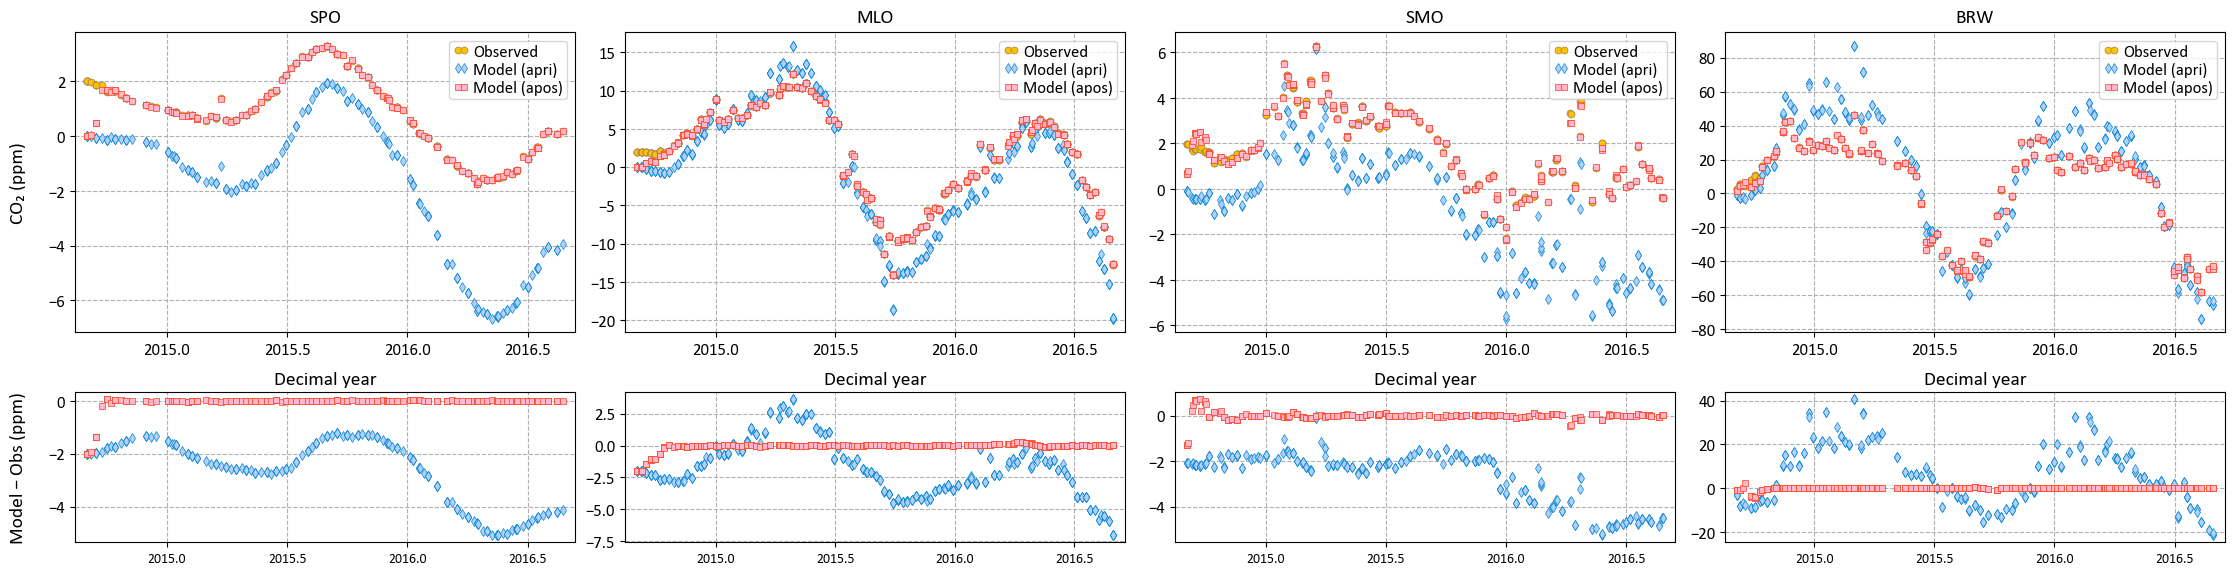

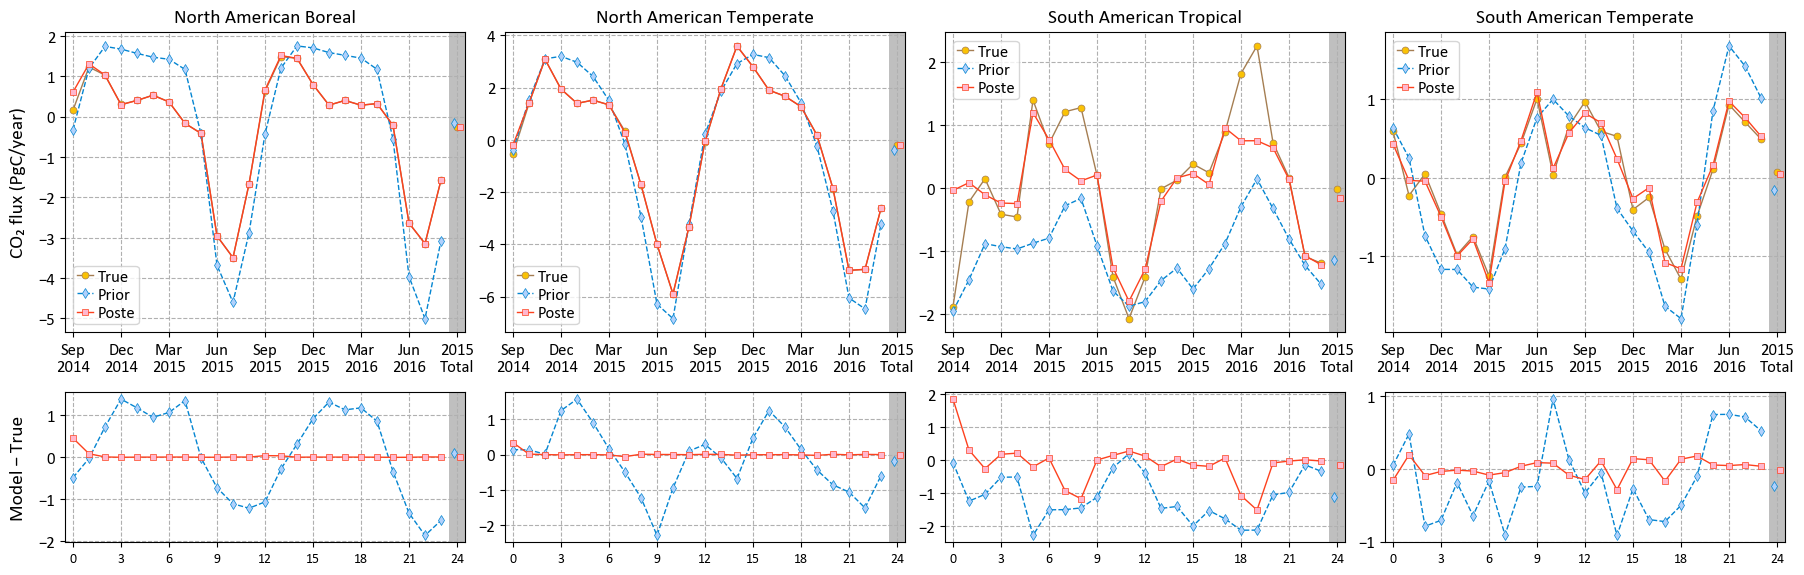

In [11]:
po2 = Visualize_Obs('all_is_const_bias')
vf2 = Visualize_Fluxes('all_is_const_bias')
po2.plot_site(['spo','mlo','smo', 'brw'])
vf2.plot_region(['North American Boreal', 'North American Temperate', 'South American Tropical', 'South American Temperate'])

#### Finally, the one with a Tropical bias

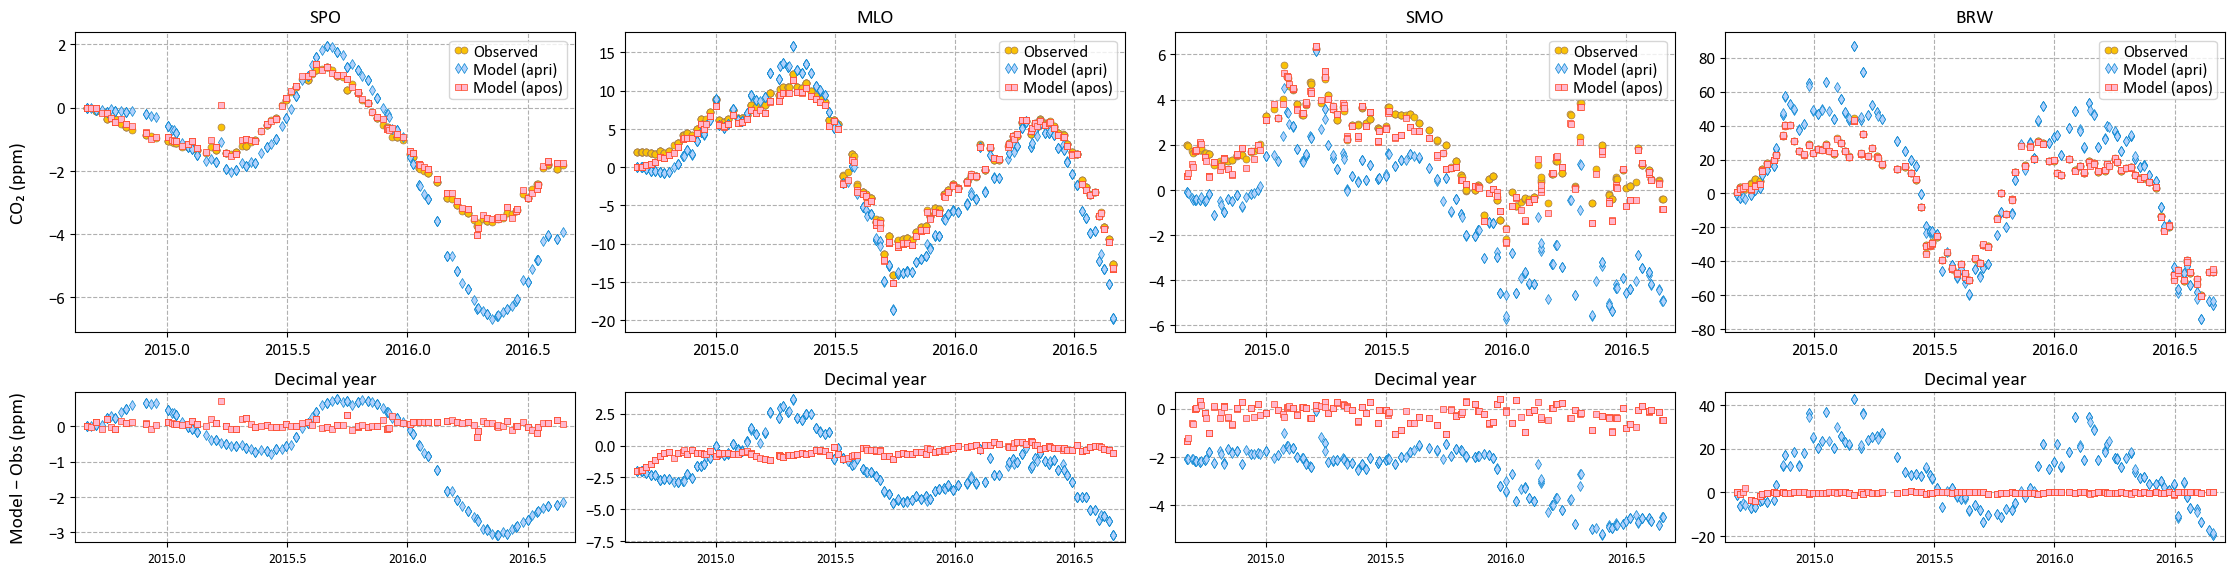

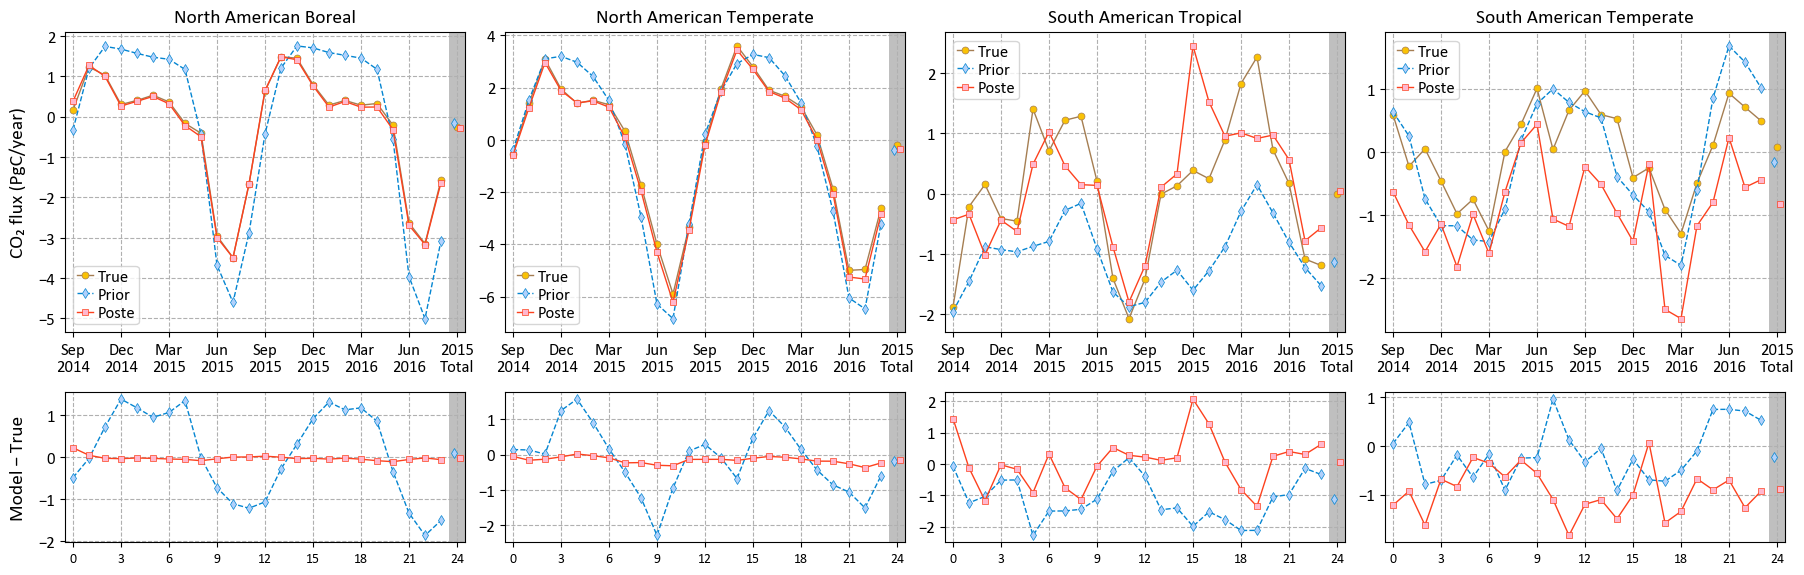

In [12]:
po3 = Visualize_Obs('all_is_tropical_bias')
vf3 = Visualize_Fluxes('all_is_tropical_bias')
po3.plot_site(['spo','mlo','smo', 'brw'])
vf3.plot_region(['North American Boreal', 'North American Temperate', 'South American Tropical', 'South American Temperate'])

#### And the northern temperate bias

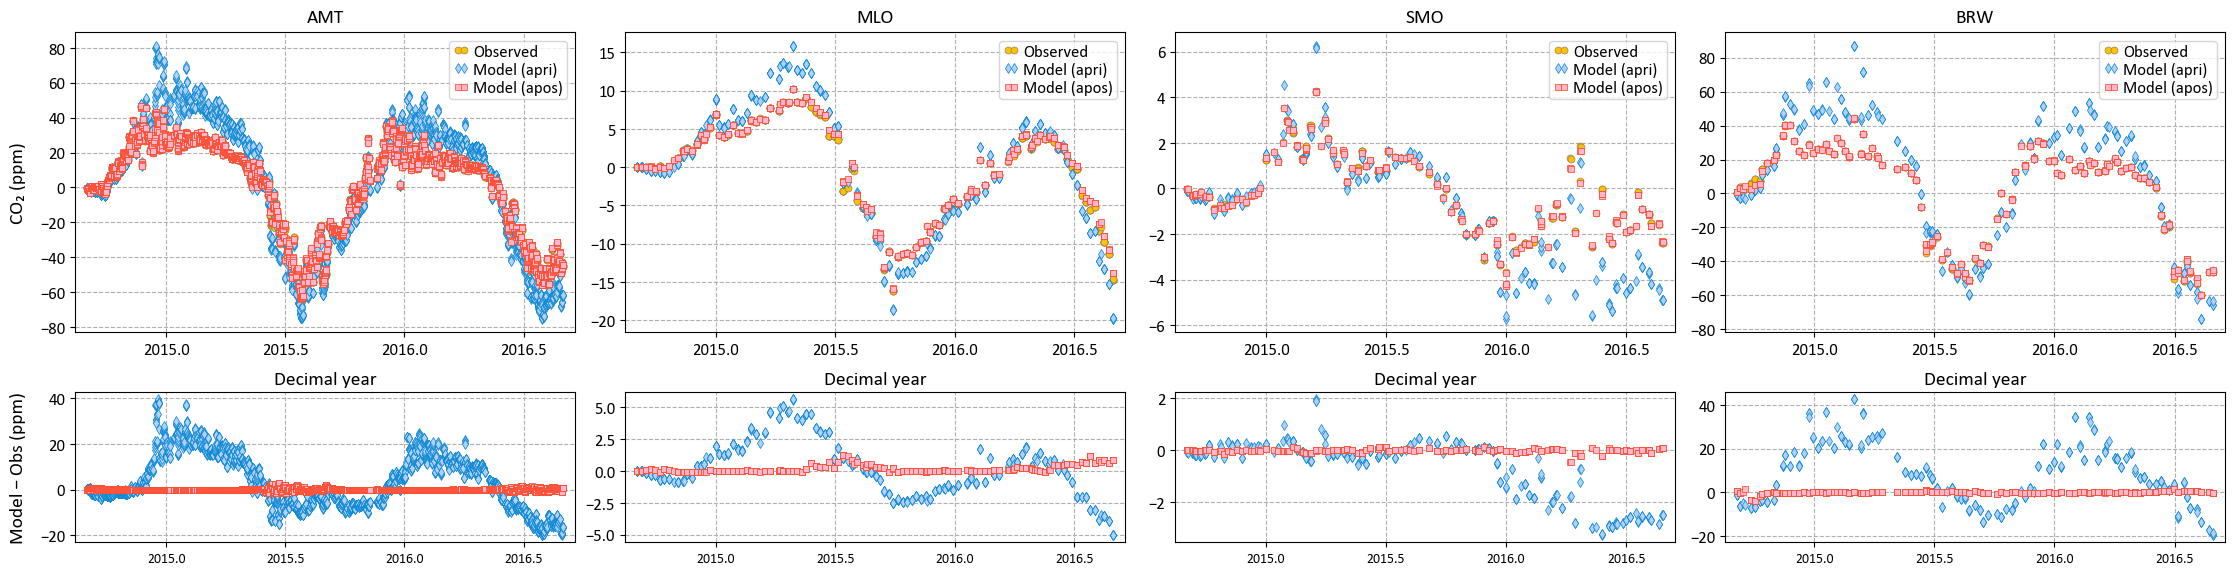

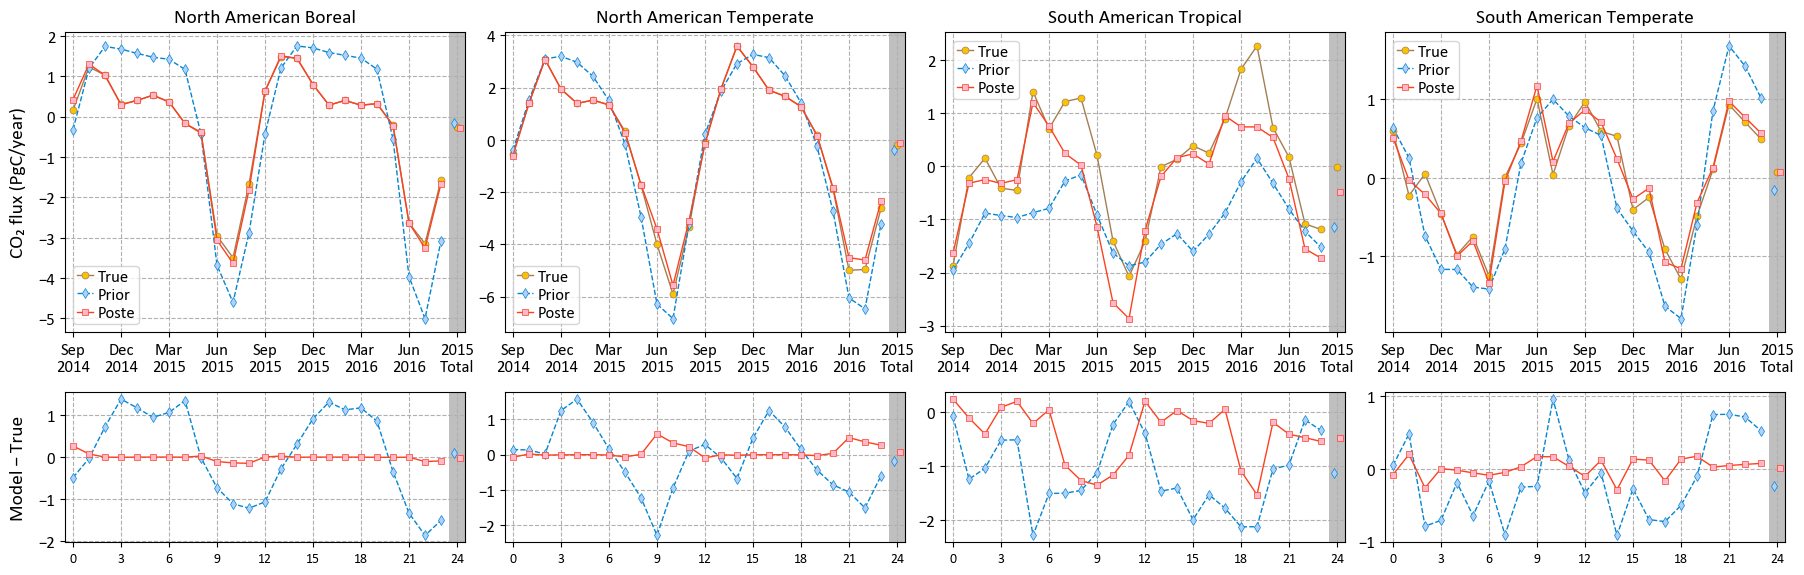

In [18]:
po4 = Visualize_Obs('all_is_ntemp_bias')
vf4 = Visualize_Fluxes('all_is_ntemp_bias')
po4.plot_site(['amt','mlo','smo', 'brw'])
vf4.plot_region(['North American Boreal', 'North American Temperate', 'South American Tropical', 'South American Temperate'])